# Task 2 Coding Decision Tree:

### Spliting the data:

In [2]:
import pandas as pd
import numpy as np
from treelib import Node, Tree
df = pd.read_csv("agaricus-lepiota.data", header = None)

### Adding columns to the dataframe and splitting it into training and testing sets
 We also remove the entries with missing values

In [3]:
from sklearn.model_selection import train_test_split

cols = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 
               'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
               'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 
               'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
df.columns = cols
df = df.drop(df[df.stalk_root  == "?"].index) # drop rows with missing values
df = df.sample(frac=1).reset_index(drop=True)

training, testing = train_test_split(df, test_size=0.2, random_state=42)

### The methods used to generate the Decision Tree

#### TASK A:

In [4]:

def entropy(target_col):
        elements,counts = np.unique(target_col,return_counts = True)
        entropy = 0
        for i in range(len(elements) ):
             entropy +=(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))
        return entropy

def information_Gain(data,split_feature, target_col="class"):
        total_entropy = entropy(data[target_col])
        vals,counts= np.unique(data[split_feature],return_counts=True)
        weighted_entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_feature]==vals[i]).dropna()[target_col]) for i in range(len(vals))])
        information_gain = total_entropy - weighted_entropy
        return information_gain

def train (data,features, target_col="class",parent_node_value = None,depth=-1, stopping_depth=3, tree =None): #training dataset
        
        #checking stopping crieteria
        if len(np.unique(data[target_col])) <= 1 or depth == stopping_depth :
            
            value = np.unique(data[target_col])[0]
            tree.create_node(value , identifier=len(tree.all_nodes())+1, parent=parent_node_value)
            return tree
           
        elif len(data) == 0:
            node_Value = np.unique(data[target_col])[np.argmax(np.unique(data[target_col],return_counts=True)[1])]

            tree.create_node(node_Value, node_Value, parent=parent_node_value)
            return tree
        
        elif len(features) ==0:
            
            return tree 
            
        else:
            
            #finding best feature
            information_Gain_List =[]

            for feature in features:
                    information_Gain_List.append(information_Gain(data,feature))
            
            best_feature_index = np.argmax(information_Gain_List)
            best_feature = features[best_feature_index]
            
            #creating tree if tree is none
            if tree is None:
                decision_tree = Tree()
                decision_tree.create_node(tag=best_feature, identifier=best_feature, parent=None)
            else:
                decision_tree = tree
                decision_tree.create_node(tag=best_feature, identifier=best_feature , parent=parent_node_value)
            
            features = features.drop(best_feature)
           
            depth += 1
            #creating sub tree with all the feature values 
            for value in np.unique(data[best_feature]):
                
                sub_data = data.where(data[best_feature] == value).dropna()
                identifier = str(best_feature) + "_" + str(value)
                decision_tree.create_node(tag=value, identifier=identifier, parent=best_feature)
                train (sub_data,features,target_col,identifier, depth, stopping_depth, decision_tree) #calling train recusively 
                
          
            return(decision_tree) 



### The Resulting Decision Tree:

In [5]:
decision_Tree = train (training, training.columns[1:], stopping_depth = np.inf)
decision_Tree.show()

odor
├── a
│   └── e
├── c
│   └── p
├── f
│   └── p
├── l
│   └── e
├── m
│   └── p
├── n
│   └── spore_print_color
│       ├── k
│       │   └── e
│       ├── n
│       │   └── e
│       ├── r
│       │   └── p
│       └── w
│           └── cap_color
│               ├── c
│               │   └── e
│               ├── g
│               │   └── e
│               ├── n
│               │   └── e
│               ├── p
│               │   └── e
│               ├── w
│               │   └── p
│               └── y
│                   └── p
└── p
    └── p



The above decision tre is generated when there is no stopping depth

The tree splits on odor
The odor n splits on spore_print_color
The spore_print_color w is split on cap_color

This is the last feature in the tree



#### TASK B
#### The following trees are generated when the stopping depth is set to 1,2,3,4:

In [6]:
decision_Tree_depth_1 = train (training, training.columns[1:], stopping_depth = 1)
decision_Tree_depth_2 = train (training, training.columns[1:], stopping_depth = 2)
decision_Tree_depth_3 = train (training, training.columns[1:], stopping_depth = 3)
decision_Tree_depth_4 = train (training, training.columns[1:], stopping_depth = 6)

print("DecisionTree with depth 1:")
decision_Tree_depth_1.show()

print("DecisionTree with depth 2:")
decision_Tree_depth_2.show()

print("DecisionTree with depth 3:")
decision_Tree_depth_3.show()

print("DecisionTree with depth 4:")
decision_Tree_depth_4.show()


DecisionTree with depth 1:
odor
├── a
│   └── e
├── c
│   └── p
├── f
│   └── p
├── l
│   └── e
├── m
│   └── p
├── n
│   └── spore_print_color
│       ├── k
│       │   └── e
│       ├── n
│       │   └── e
│       ├── r
│       │   └── p
│       └── w
│           └── e
└── p
    └── p

DecisionTree with depth 2:
odor
├── a
│   └── e
├── c
│   └── p
├── f
│   └── p
├── l
│   └── e
├── m
│   └── p
├── n
│   └── spore_print_color
│       ├── k
│       │   └── e
│       ├── n
│       │   └── e
│       ├── r
│       │   └── p
│       └── w
│           └── cap_color
│               ├── c
│               │   └── e
│               ├── g
│               │   └── e
│               ├── n
│               │   └── e
│               ├── p
│               │   └── e
│               ├── w
│               │   └── p
│               └── y
│                   └── p
└── p
    └── p

DecisionTree with depth 3:
odor
├── a
│   └── e
├── c
│   └── p
├── f
│   └── p
├── l
│   └── e
├── m
│   └── p
├── n
│   └── 

The above trees with depth >2 are all the same, the tree with depth = 1 is smaller than the others. 

#### TASK C

My tree was trained with the testing data.
In the following cell, I have calculated the accuracy, recall, precision, and f-score.

The data that is used to calculate the afformentioned statistics is the testing that the tree has not seen. 

All my methods use the predict method that takes an entry and returns the predicted

My accuracy, recall, precision, and f-score were all calculated to be 100%

In [7]:


def predict(df, tree):  #this method predicts the class of a given row in the dataframe
    
    node = tree.get_node(tree.root)
    while not node.is_leaf():
        
        feature = node.tag 
        value = df[feature]
        
        tree_feature = tree.get_node(feature + "_" + value)
        children = tree.children(tree_feature.identifier)
        if (children[0].is_leaf()):
             return children[0].tag
        else:
             
            node = children[0]
         
def true_positive(df, tree):
    
    tp = 0
    for i in range(len(df)):
        predicted = predict(df.iloc[i], tree)
        ground_truth = df.iloc[i]["class"]
        if predicted == ground_truth and ground_truth == "e":
            tp += 1
        
    return tp
    # return np.divide(correct,len(df))
def false_positive(df, tree):
    
    fp = 0
    for i in range(len(df)):
        predicted = predict(df.iloc[i], tree)
        ground_truth = df.iloc[i]["class"]
        if predicted != ground_truth and ground_truth == "p":
            fp += 1
        
    return fp
def false_negative(df, tree):
        
        fn = 0
        for i in range(len(df)):
            predicted = predict(df.iloc[i], tree)
            ground_truth = df.iloc[i]["class"]
            if predicted != ground_truth and ground_truth == "e":
                fn += 1
            
        return fn
def precision(df, tree):
    tp = true_positive(df, tree)
    fp = false_positive(df, tree)

    return float(tp)/float(tp + fp)
def recall(df, tree):
    tp = true_positive(df, tree)
    fn = false_negative(df, tree)

    return float(tp)/float(tp + fn)
def f_score(df, tree):
    precision_score = precision(df, tree)
    recall_score = recall(df, tree)

    return float(2 * precision_score * recall_score)/float(precision_score + recall_score)

    # return np.divide(correct,len(df))
def accuracy(df, tree):
    correct = 0
    for i in range(len(df)):
        predicted = predict(df.iloc[i], tree)
        ground_truth = df.iloc[i]["class"]
        if predicted == ground_truth:
            correct += 1
       
    # return np.divide(correct,len(df))
    return  float(correct)/len(df)  * 100

acc = accuracy(testing, decision_Tree)
prec = precision(testing, decision_Tree)
rec = recall(testing, decision_Tree)
f1 = f_score(testing, decision_Tree)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)


Accuracy:  100.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


#### TASK D

I have used K-fold cross-validation and a confusion matrix as my evaluation method. 

The explanation for the confusion matrix and cross-validation are described in the comments below

Cross Validation Score for  5  training folds: 100.0
Cross Validation Score for  5  full folds: 100.0
Confusion Matrix:


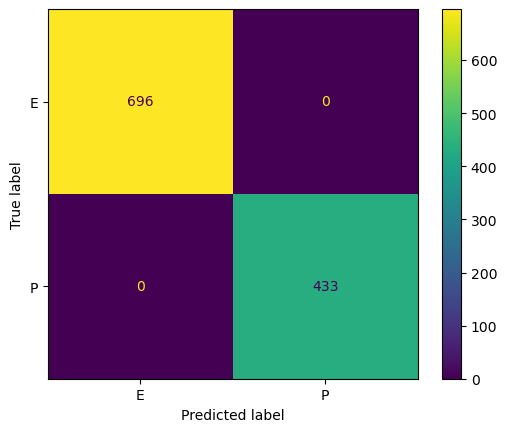

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics

def confusion_matrix(): #this method calculates the confusion matrix and plots it
    
    ground_truth = testing["class"].values #getting the ground truth values
    predicted = [] 
    for i in range(len(testing)): # looping through the testing data
        row = testing.iloc[i]
        row.colums =cols
        predicted.append(predict(testing.iloc[i], decision_Tree)) #getting the predicted values

    ##setting up confusion matrix
    confusion_matrix = metrics.confusion_matrix(ground_truth, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["E", "P"])
    print("Confusion Matrix:")
    cm_display.plot()
    plt.show() #plotting the confusion matrix

def cross_validation(data, k_folds): #this method performs k-fold cross validation
    
    folds = np.array_split(data, k_folds) #splitting the dataset into k folds
    metrics  =[ ]

    for i in range(k_folds): #looping through the folds

        X_train_cv = pd.concat([fold for j, fold in enumerate(folds) if j != i]) ##getting the  data and not the validation data
        X_val_cv = folds[i] #validation data

        model = train (X_train_cv, X_train_cv.columns[1:], stopping_depth = np.inf) #building the decision tree using the  data

        acc = accuracy(X_val_cv,model) #getting the accuracy of the model on the validation data
        metrics.append(acc) #appending the accuracy to the metrics list

    
    average = np.mean(metrics) #averaging the accuracy of the k models
    return average

k_folds = 5 # setting up the number of folds
cross_val_training = cross_validation(training, k_folds) # performing cross validation
cross_val_full = cross_validation(df, k_folds) # performing cross validation
print("Cross Validation Score for ",k_folds, " training folds:", cross_val_training)
print("Cross Validation Score for ",k_folds, " full folds:", cross_val_full)

confusion_matrix()